# Principal Component Analysis

In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.axes._subplots import Axes

In [41]:
from typing import Dict

In [42]:
from sklearn.decomposition import PCA

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
data_path = "C:/Users/pemma/OneDrive - Université de Tours/Mécen/M2/S1/02 - Machine Learning/05 - Projet/price_prediction_vestiaire_collective/backup/data/"

In [45]:
data = pd.read_pickle(data_path+"train.pkl")

In [46]:
X_tr = data["X"]

In [47]:
X_tr.shape

(6700, 9)

In [48]:
enc = OneHotEncoder(
    drop="first",
    handle_unknown="ignore", 
    sparse=False
)
enc.fit(X_tr)
X_tr = enc.transform(X_tr)

In [49]:
X_tr.shape

(6700, 116)

In [50]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [51]:
pca = PCA()

In [52]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [53]:
pca.fit(X_tr)

PCA()

In [54]:
def pca_results(pca: PCA) -> Dict: 
    """Return singular values, explained variance ratios 
    and cumulated variance for each principal component."""
    d = {
        "pc": [], 
        "sing_var": [], 
        "var_ratio": [], 
        "cum_var": []
    }
    for pc in range(pca.n_components_):
        d["pc"].append(pc)
        d["sing_var"].append(pca.singular_values_[pc])
        d["var_ratio"].append(pca.explained_variance_ratio_[pc])
    d["cum_var"] = np.cumsum(d["var_ratio"])
    return d

In [55]:
pca_results = pca_results(pca)
pd.DataFrame.from_dict(data=pca_results)

,pc,sing_var,var_ratio,cum_var
0,0,6.401049e+01,1.103070e-01,0.110307
1,1,5.543531e+01,8.273202e-02,0.193039
2,2,5.367556e+01,7.756286e-02,0.270602
3,3,4.096042e+01,4.516785e-02,0.315770
4,4,3.545783e+01,3.384738e-02,0.349617
...,...,...,...,...
111,111,2.035497e+00,1.115429e-04,0.999987
112,112,6.895334e-01,1.280004e-05,1.000000
113,113,2.505182e-13,1.689583e-30,1.000000
114,114,1.079588e-13,3.137737e-31,1.000000


In [56]:
def plot_explained_variance(
    pca_res: Dict,
    ax: Axes
):
    """Return a plot of explained variance ratios"""
    ax.bar(
        x=pca_results["pc"], 
        height=pca_results["var_ratio"], 
        alpha=.5, 
    )
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("% variance explained")
    ax.set_xlim(0, len(pca_results["pc"]))
    ax.set_ylim(0, max(pca_results["var_ratio"]))

In [57]:
def get_opti_pc(
    pca_res: Dict, 
    var_thresold: float = .8
) -> int: 
    """Return the minimum number of components 
    to get at leats a certain amount of explained variance."""
    pcs, _, _, cum_var = list( pca_res.values() )
    for pc, val in zip(pcs, cum_var): 
        if val > var_thresold: 
            return pc

In [58]:
def plot_cumulated_explained_variance(
    pca_res: Dict,
    ax: Axes, 
    var_thresold: float = .9
):
    """Return a plot of cumulated explained variance with a % variance thresold."""
    opti_pc = get_opti_pc(
        pca_res=pca_res, 
        var_thresold=var_thresold
    )
    n_pcs = len(pca_results["pc"])
    ax.plot(
        pca_results["pc"], 
        100*pca_results["cum_var"],
        label="Cumalated variance" 
    )
    ax.plot(
        [ opti_pc for _ in range(n_pcs) ], 
        np.linspace(0, 100, n_pcs),  
        label=f"{100*var_thresold}% variance explained",
        linestyle="dashed", 
        color="black"
    )
    ax.set_title(f"{opti_pc} principal components to get at least {100*var_thresold}% variance explained")
    ax.set_xlabel("Principal Components")
    ax.set_ylabel("% variance explained")
    ax.set_xlim(0, len(pca_results["pc"]))
    ax.set_ylim(0, 100)
    ax.legend()

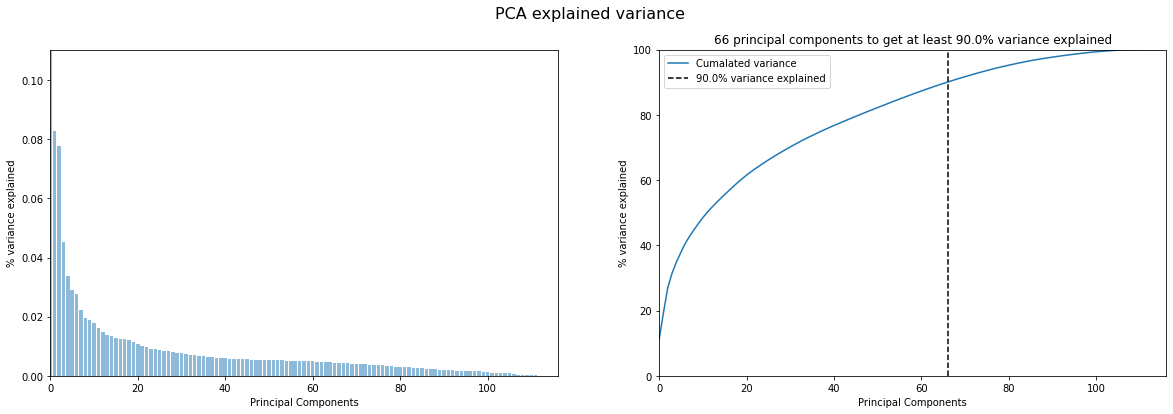

In [59]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20, 6))
fig.suptitle("PCA explained variance", size=16)
plot_explained_variance(
    pca_res=pca_results, 
    ax=ax1
)
plot_cumulated_explained_variance(
    pca_res=pca_results, 
    ax=ax2, 
    var_thresold=.9
)